# **AP157 Machine Learning Lab Assignment**
### Module B1: Digital Image Formation and Enhancement

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Mendoza, Genesis Adam \
_Student No._: 2019-05415 \
_Section_: THY-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 23/05/2024 - 11:47 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** GENESIS ADAM D. MENDOZA

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [114]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import skimage
import scipy
from skimage import color, data, exposure
from skimage.transform import rescale
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 0.75


#### PART 1 - Create synthetic greyscale images *(30 points)*

Simulate a 1 cm x 1 cm optical element with a sinusoid along the x-direction with a given frequency-- generate images with frequencies of 1, 3, and 5 cycles/cm. The size of each image should be 400x400 pixels.

For each frequency, show the:
1. [15 pts.; 5 pts. each] Image heatmap (range of pixel values should be between 0 to 255)
2. [15 pts.; 5 pts. each] Plot showing 3-D view



Sample output for frequency of 5 cycles/cm is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link



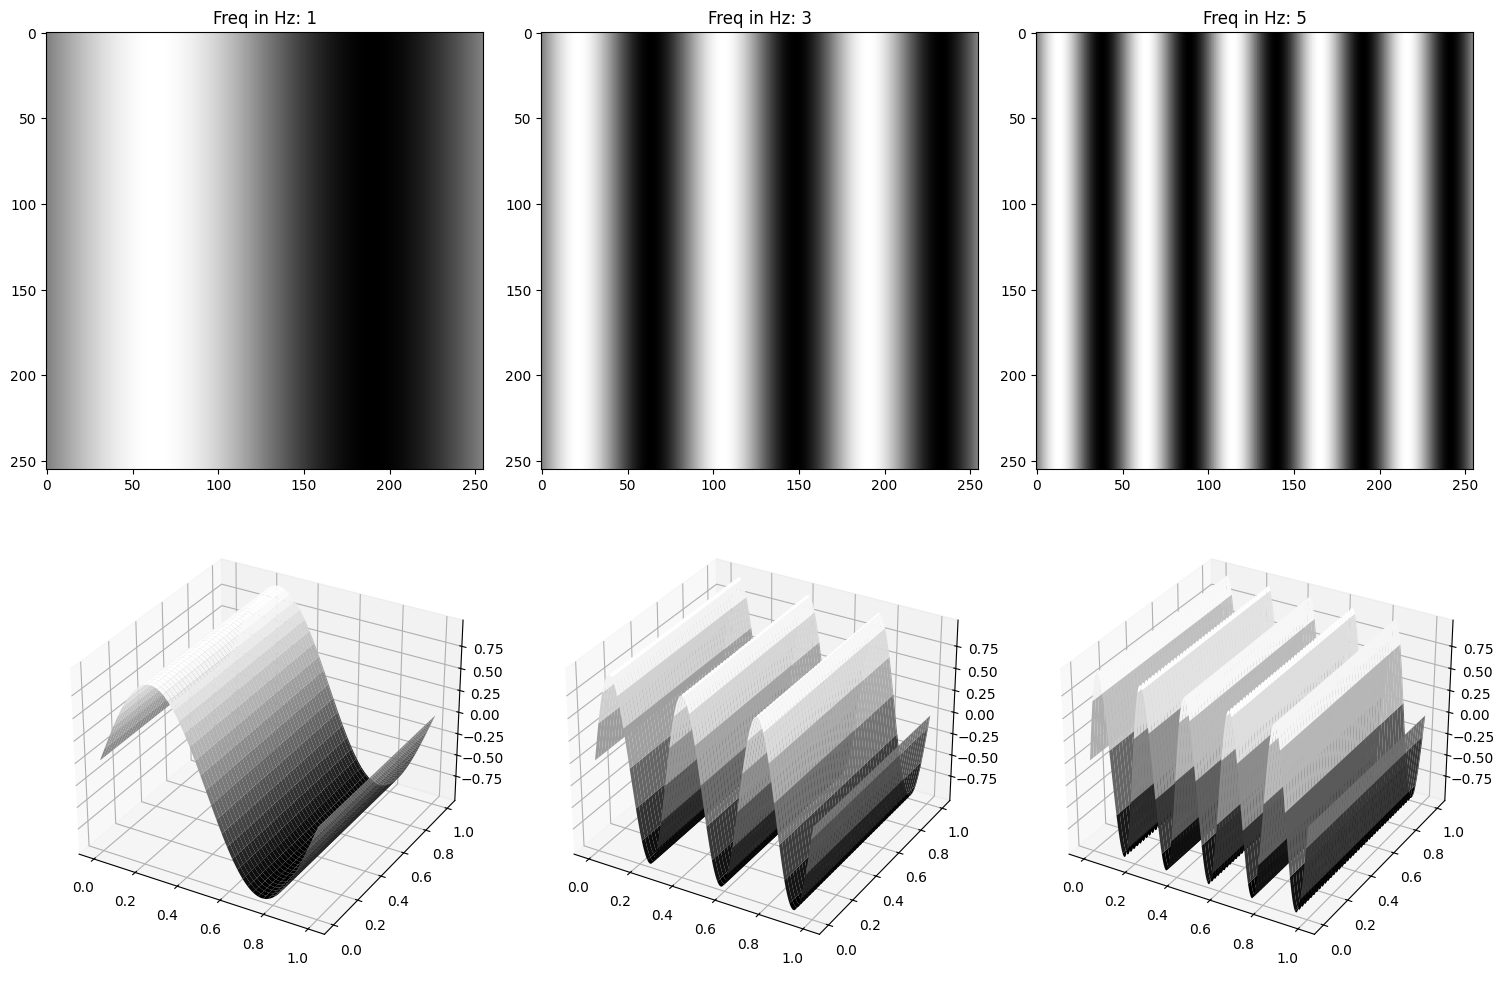

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pts = 255
x_space = np.linspace(0, 1, pts)
y_space = np.linspace(0, 1, pts)
freqs = [1, 3, 5]

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i in range(3): ax[1,i].axis('off')

for k in range(len(freqs)):
    sinus_plot = np.zeros((pts, pts))
    for i in range(pts):
        for j in range(pts):
            sinus_plot[i, j] = np.sin(2 * np.pi * freqs[k] * y_space[j])
    ax[0, k].imshow(sinus_plot, cmap='gray')
    ax[0, k].set_title('Freq in Hz: ' + str(freqs[k]))

for k in range(len(freqs)):
    sinus_plot_3d = np.zeros((pts, pts))
    for i in range(pts):
        for j in range(pts):
            sinus_plot_3d[i, j] = np.sin(2 * np.pi * freqs[k] * y_space[j])
    x, y = np.meshgrid(x_space, y_space)
    ax[1, k] = fig.add_subplot(2, 3, k + 4, projection='3d')
    ax[1, k].plot_surface(x, y, sinus_plot_3d, cmap='gray')

plt.tight_layout()
plt.show()


#### PART 2 - Create color images *(30 points)*

Recreate the Olympics logo as an image. It is fine if the colors overlap where the rings intersect.

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link

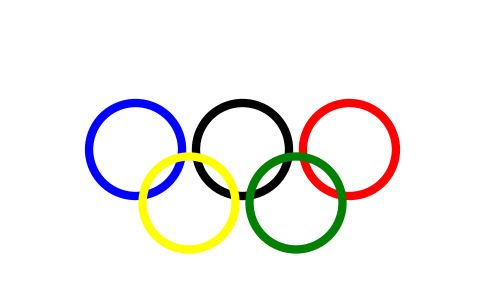

In [116]:
rad = 0.5
thick = 6
x0, y0 = (0,0)

gap = 0.65
fig, ax = plt.subplots()
ax.axis('off')

black= plt.Circle((x0, y0), rad , fill=False, lw=thick, color="black")
blue= plt.Circle((x0 - gap - rad, y0), rad , fill=False, lw=thick, color="blue")
red= plt.Circle((x0 + gap + rad, y0), rad , fill=False, lw=thick, color="red")
yellow= plt.Circle(((x0-rad-gap)/2, (y0-rad-gap)/2), rad , fill=False, lw=thick, color="yellow")
green= plt.Circle(((x0+rad+gap)/2, (y0-rad-gap)/2), rad , fill=False, lw=thick, color="green")

plt.xlim(-2.5, 2.5)
plt.ylim(-1.5, 1.5)

ax.set_aspect(1)
ax.add_artist(blue)
ax.add_artist(black)
ax.add_artist(red)
ax.add_artist(yellow)
ax.add_artist(green)

In [117]:
def double_slit(sw, sh, sep):
    x_grid = 1000
    y_grid = 1000
    d_slit = np.zeros([x_grid,y_grid])
    slit_width = sw
    slit_height = sh
    sep = sep

    vert_pad = (y_grid-slit_height)/2
    hor_pad = (x_grid-sep-2*slit_width)/2

    d_slit[int(vert_pad):int(y_grid-vert_pad),int(hor_pad):int(hor_pad+slit_width)] = 1
    d_slit[int(vert_pad):int(y_grid-vert_pad),int(hor_pad+slit_width+sep):int(hor_pad+2*slit_width+sep)] = 1
    plt.imshow(d_slit, cmap='gray')
    return d_slit

d_slit = double_slit(30, 400, 10)

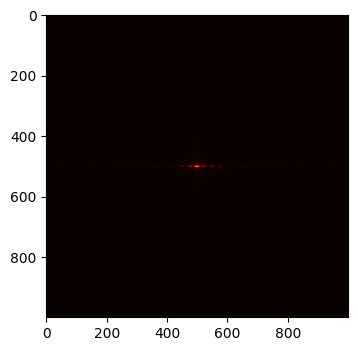

In [ ]:
diff_plot = np.fft.fft2(d_slit)
diff_plot = np.fft.fftshift(diff_plot)

plt.imshow(np.abs(diff_plot), cmap='hot')
plt.show()

#### PART 3 - Apply image enhancement *(40 points)*

Apply contrast stretching to an astronaut image.

Show the following:
1. [20 pts.] Original and contrast-stretched image
2. [10 pts.] Probability Distribution Function (PDF) plot showing curves for the original and contrast-stretched image
3. [10 pts.] Cumulative Distribution Function (CDF) plot showing curves for the original and contrast-stretched image

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/12-cPwAr7hVUPBKIthvcQgvqjvEOmwyxJ/view?usp=drive_link

First step is to load the image-- available from the scikit-image (skimage) library-- and make a low-contrast version, using the code below:

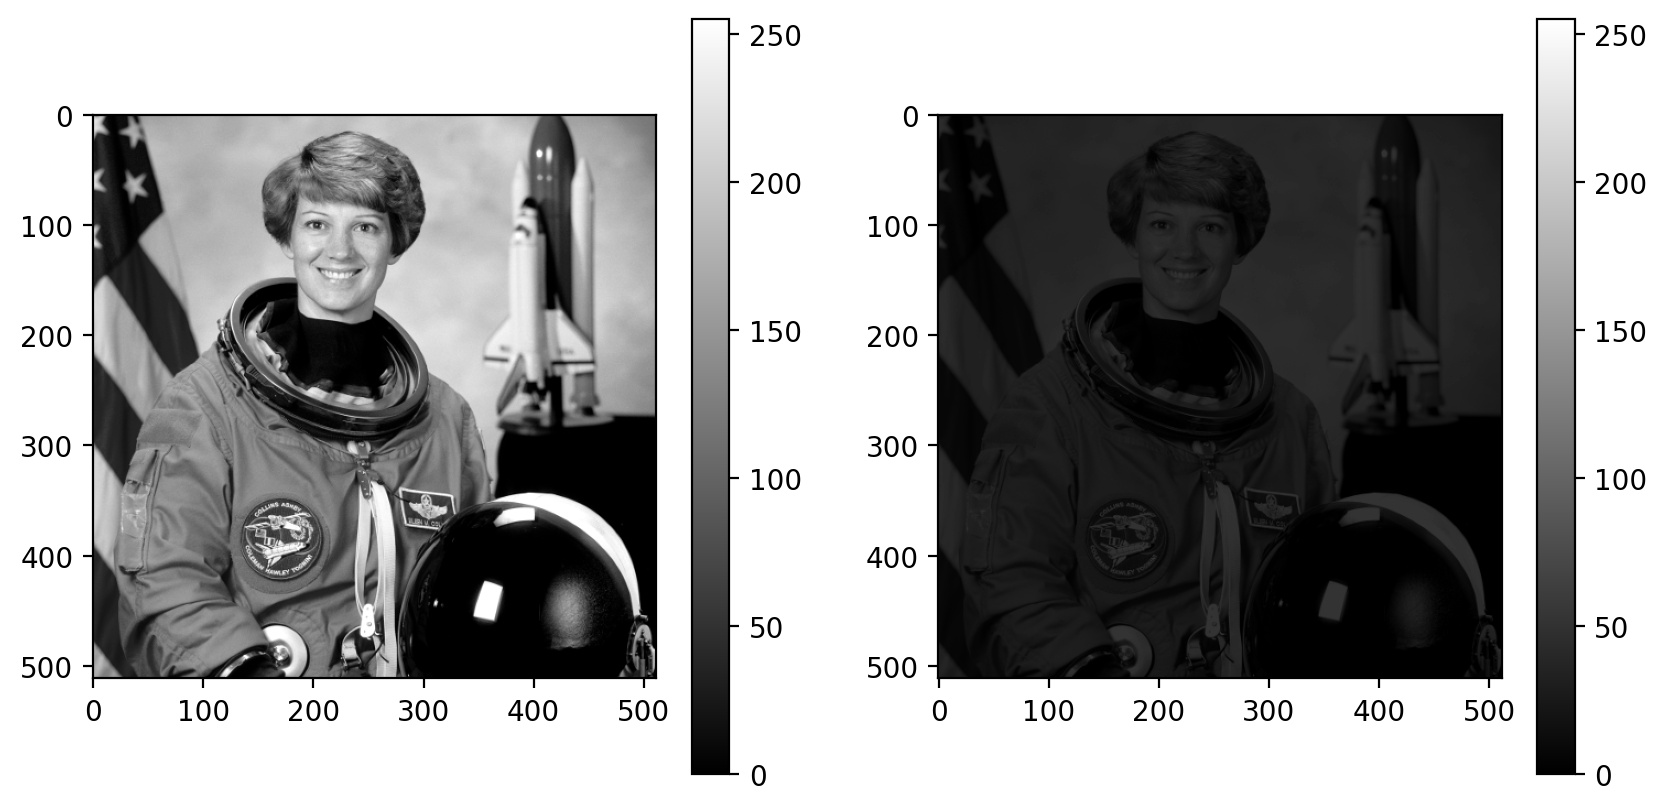

In [ ]:
img = color.rgb2gray(data.astronaut())*256 # original astronaut image
plt.figure(figsize=(10,5), dpi = 200)   
plt.subplot(121)
plt.imshow(img, cmap = 'gray', vmax = 255)
plt.colorbar()

img_low_contrast = img/5 # low contrast astronaut image
plt.subplot(122)
plt.imshow(img_low_contrast, cmap = 'gray', vmax = 255)
plt.colorbar()

Next, write your code to apply contrast stretching, calculate the PDF and CDF of the original and contrast-stretched images. Finally, display the images and PDF and CDF plots.

In [ ]:
img = data.astronaut()
def contr_stretch(img_init, percent_stretch):
    if len(img_init.shape) == 3:
        img_array_0 = skimage.color.rgb2gray(img_init) #convert rgb to a single grayscale channel
    else:
        img_array_0 = img_init
    img_array = img_array_0*255
    img_stretch = img_array*percent_stretch/100
    plt.imshow(img_stretch, cmap = 'gray', vmax = 255)
    plt.figure(dpi = 150)
    plt.show()

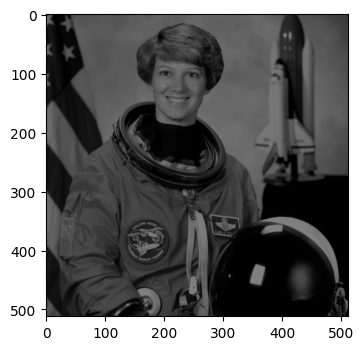

<Figure size 900x600 with 0 Axes>

In [ ]:
contr_stretch(img, 50)

In [ ]:
def pdf_plot(img_init, percent_stretch):
    if len(img_init.shape) == 3:
        img_array_0 = skimage.color.rgb2gray(img_init) #convert rgb to a single grayscale channel
        
    else:
        img_array_0 = img_init
    img_array = img_array_0*255
    img_stretch = img_array*percent_stretch/100

    u8bins = np.arange(256)
    height_0, bins_0 = np.histogram(img_array, bins=u8bins, density=True)
    height_1, bins_1 = np.histogram(img_stretch, bins=u8bins, density=True)
    plt.figure(dpi = 100)
    plt.plot(bins_0[:-1], height_0, label = 'Original')
    plt.plot(bins_1[:-1], height_1, label = 'Contrast Stretched')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

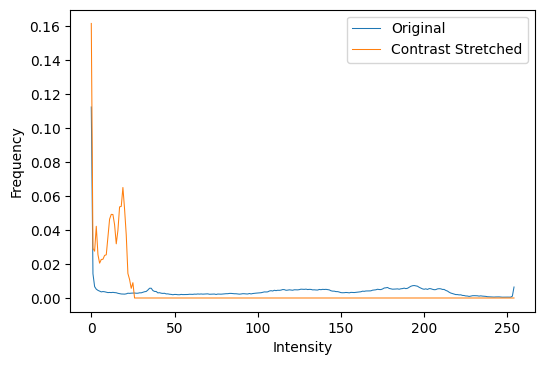

In [ ]:
pdf_plot(img, 10)

In [ ]:
def cdf_plot(img_init, percent_stretch):
    if len(img_init.shape) == 3:
        img_array_0 = skimage.color.rgb2gray(img_init) #convert rgb to a single grayscale channel
        
    else:
        img_array_0 = img_init
    img_array = img_array_0*255
    img_stretch = img_array*percent_stretch/100

    u8bins = np.arange(256)
    height_0, bins_0 = np.histogram(img_array, bins=u8bins, density=True)
    height_1, bins_1 = np.histogram(img_stretch, bins=u8bins, density=True)
    plt.figure(dpi = 100)
    plt.plot(bins_0[:-1], height_0.cumsum(), label = 'Original')
    plt.plot(bins_1[:-1], height_1.cumsum(), label = 'Contrast Stretched')
    plt.xlabel('Intensity')
    plt.xlim(0, 255)
    plt.legend()
    plt.show()

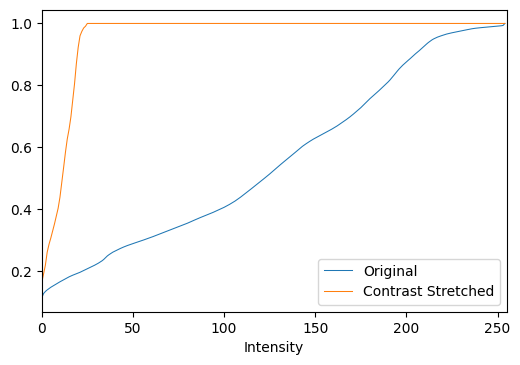

In [ ]:
cdf_plot(img, 10)

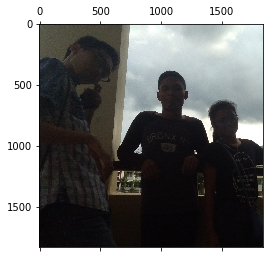

<Figure size 1200x800 with 0 Axes>

In [ ]:
file_path = "..//images//"
shs = skimage.io.imread(file_path + "shs.jpg")
plt.matshow(shs)
plt.figure(dpi = 200)
plt.show()

Backprojection

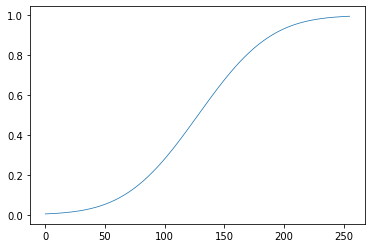

In [ ]:
#We want the image to have this CDF

plt.plot(np.arange(256), scipy.stats.norm.cdf(np.arange(256), loc=256/2, scale=48))

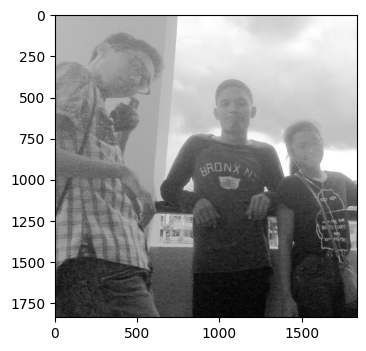

In [ ]:
def b_proj(img_init, percent_stretch):
    if len(img_init.shape) == 3:
        img_array_0 = skimage.color.rgb2gray(img_init) #convert rgb to a single grayscale channel
        
    else:
        img_array_0 = img_init
    img_array = img_array_0*255
    img_stretch = img_array*percent_stretch/100

    u8bins = np.arange(256)
    height_0, bins_0 = np.histogram(img_array, bins=u8bins, density=True)
    backproj = np.interp(img_array, bins_0[:-1], height_0.cumsum()/ height_0.sum())
    backproj = np.reshape(backproj, img_array.shape)
    plt.figure(dpi = 100)
    plt.imshow(backproj, cmap = 'gray')
    plt.show()

b_proj(shs, 100)